In [1]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the Dataset.
url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Avocado/avocado.csv.zip?raw=true'
df = pd.read_csv(url, compression='zip')

In [3]:
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


# Exploratory Data Analysis

In [4]:
# Checking the dimensions of the dataset.
df.shape

(18249, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Here, we can see that the datatype of Date is object but it should be Date&Time. Let's change its datatype.

In [16]:
# Changing Datetype of Date column.
df['Date']=pd.to_datetime(df.Date)

In [17]:
df['Date'].dtype

dtype('<M8[ns]')

In [8]:
df.drop(["Unnamed: 0"], axis=1,inplace=True)

In [10]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [11]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [12]:
df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [14]:
# Let's check for duplicated values.
df.duplicated().sum()

0

We dont have any duplicated value in the dataset.

<Axes: >

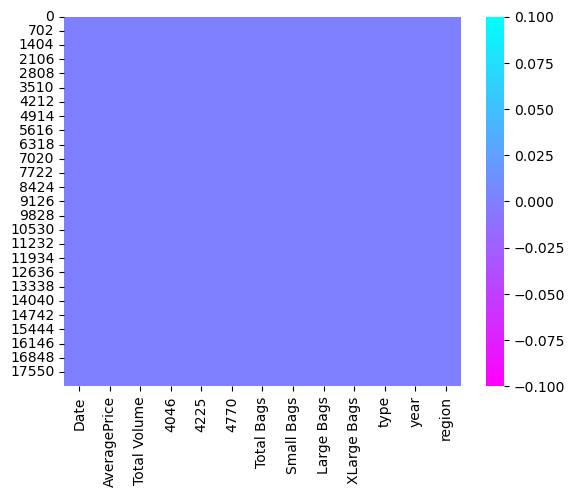

In [15]:
# Now visualize using heatmap.
sns.heatmap(df.isnull(), cmap = "cool_r")

# Description of Dataset

In [18]:
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,2016-08-13 23:30:43.498273792,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
min,2015-01-04 00:00:00,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,2015-10-25 00:00:00,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,2016-08-14 00:00:00,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,2017-06-04 00:00:00,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,2018-03-25 00:00:00,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938


1. Count of all the columns are same hence there is no missing data in the dataset.
2. Mean is greater than median, skewness possible.
3. Differences between max and 75% can be seen also.

# Data Visualization

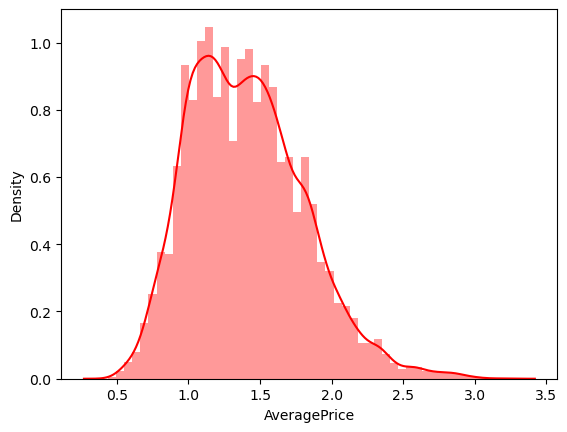

In [19]:
ax = sns.distplot(df['AveragePrice'], kde = True, color = 'r')

In [20]:
df['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

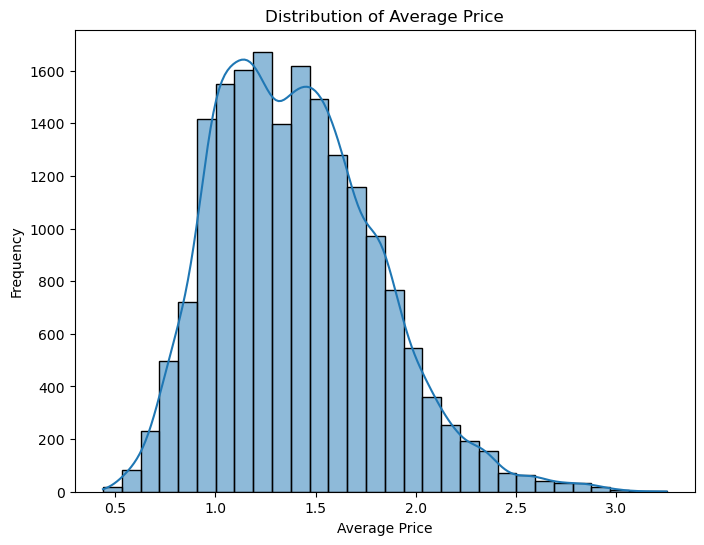

In [21]:
# Histogram of 'AveragePrice'
plt.figure(figsize=(8, 6))
sns.histplot(df['AveragePrice'], bins=30, kde=True)
plt.title('Distribution of Average Price')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

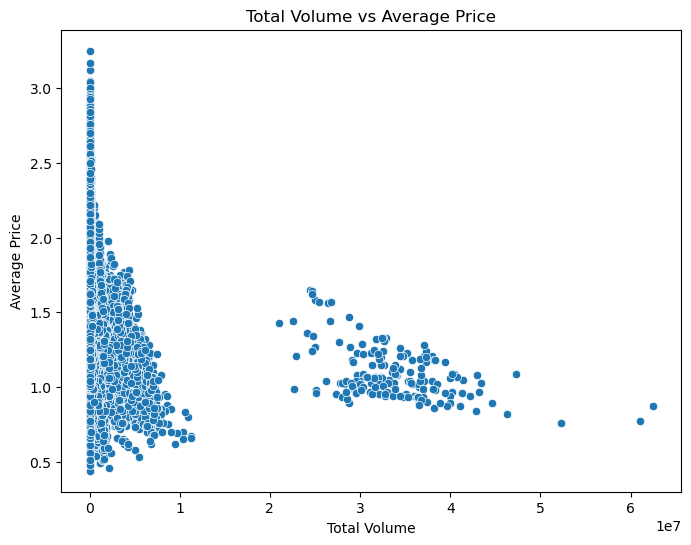

In [26]:
# Scatter plot of 'Total Volume' vs 'AveragePrice'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Total Volume', y='AveragePrice')
plt.title('Total Volume vs Average Price')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.show()

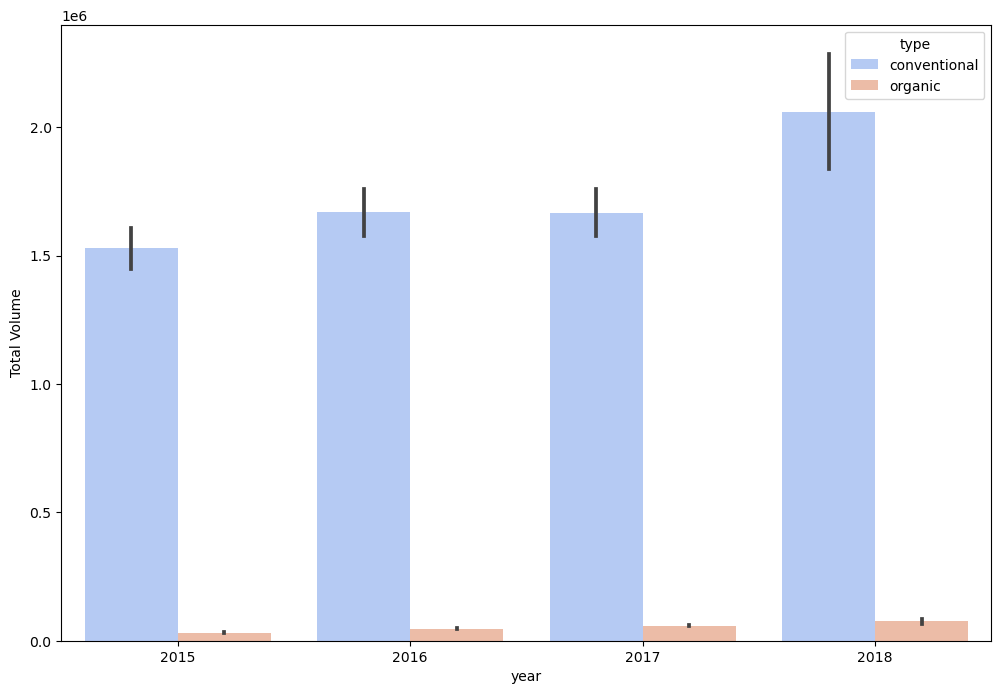

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x='year', y='Total Volume', hue='type',data=df, palette='coolwarm',ci=68)
plt.show()

In [28]:
df.sort_values(by=['Date'], inplace=True, ascending=True)

In [29]:
df1=df.copy()

In [30]:
# Creating Datframe for numeric features
df1.drop(['Date','type','region','year'], axis=1, inplace=True)

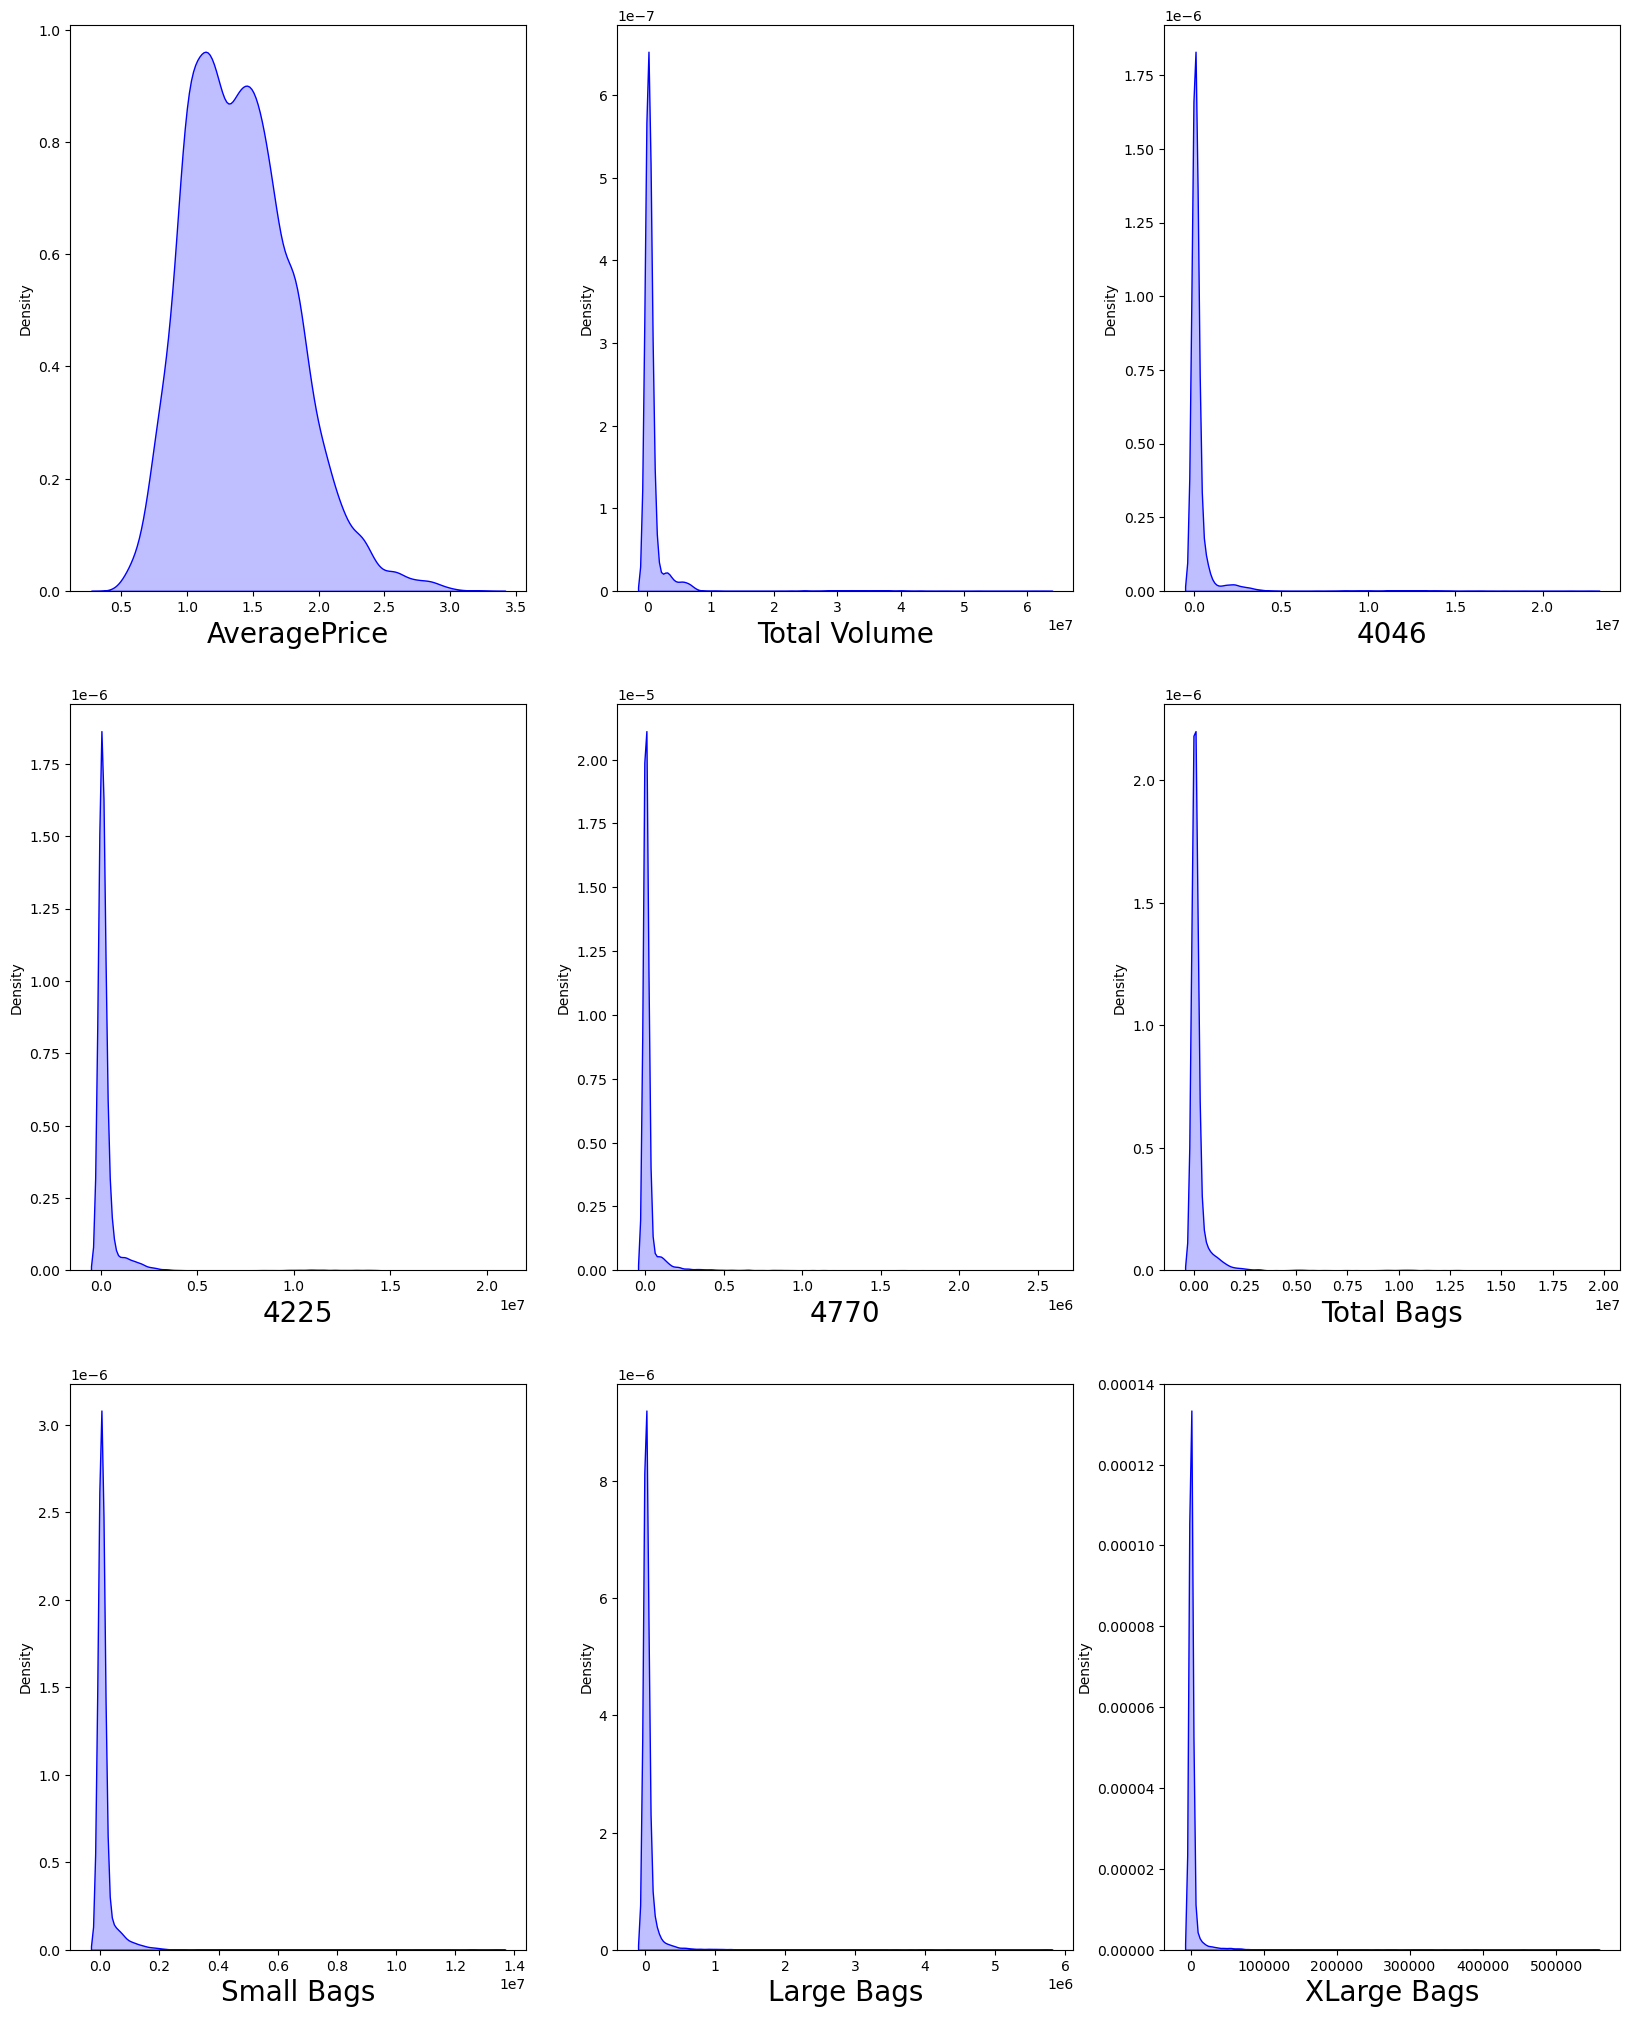

In [33]:
plt.figure(figsize=(20,25), facecolor='white')   #For numerical features.
plotnumber =1
for column in df1:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column], color='b',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can see that the data is rightly skewed.

#### Avocado price and availability changes, because of seasonal changes. Lets check averageprice and salesvolume for each month.

In [34]:
df3=df.copy()

In [37]:
df3.drop(columns=['Date','year'], inplace=True)
df3

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
11569,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,Southeast
9593,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,Chicago
10009,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,HarrisburgScranton
1819,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,Pittsburgh
9333,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,Boise
...,...,...,...,...,...,...,...,...,...,...,...
8574,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,Chicago
9018,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,SouthCentral
18141,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,SouthCentral
17673,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,California


In [36]:
df['Date'] = df['Date'].astype(str)

# Split 'Date' column into 'year', 'month', and 'day'
df[['year', 'month', 'day']] = df['Date'].str.split('-', expand=True)

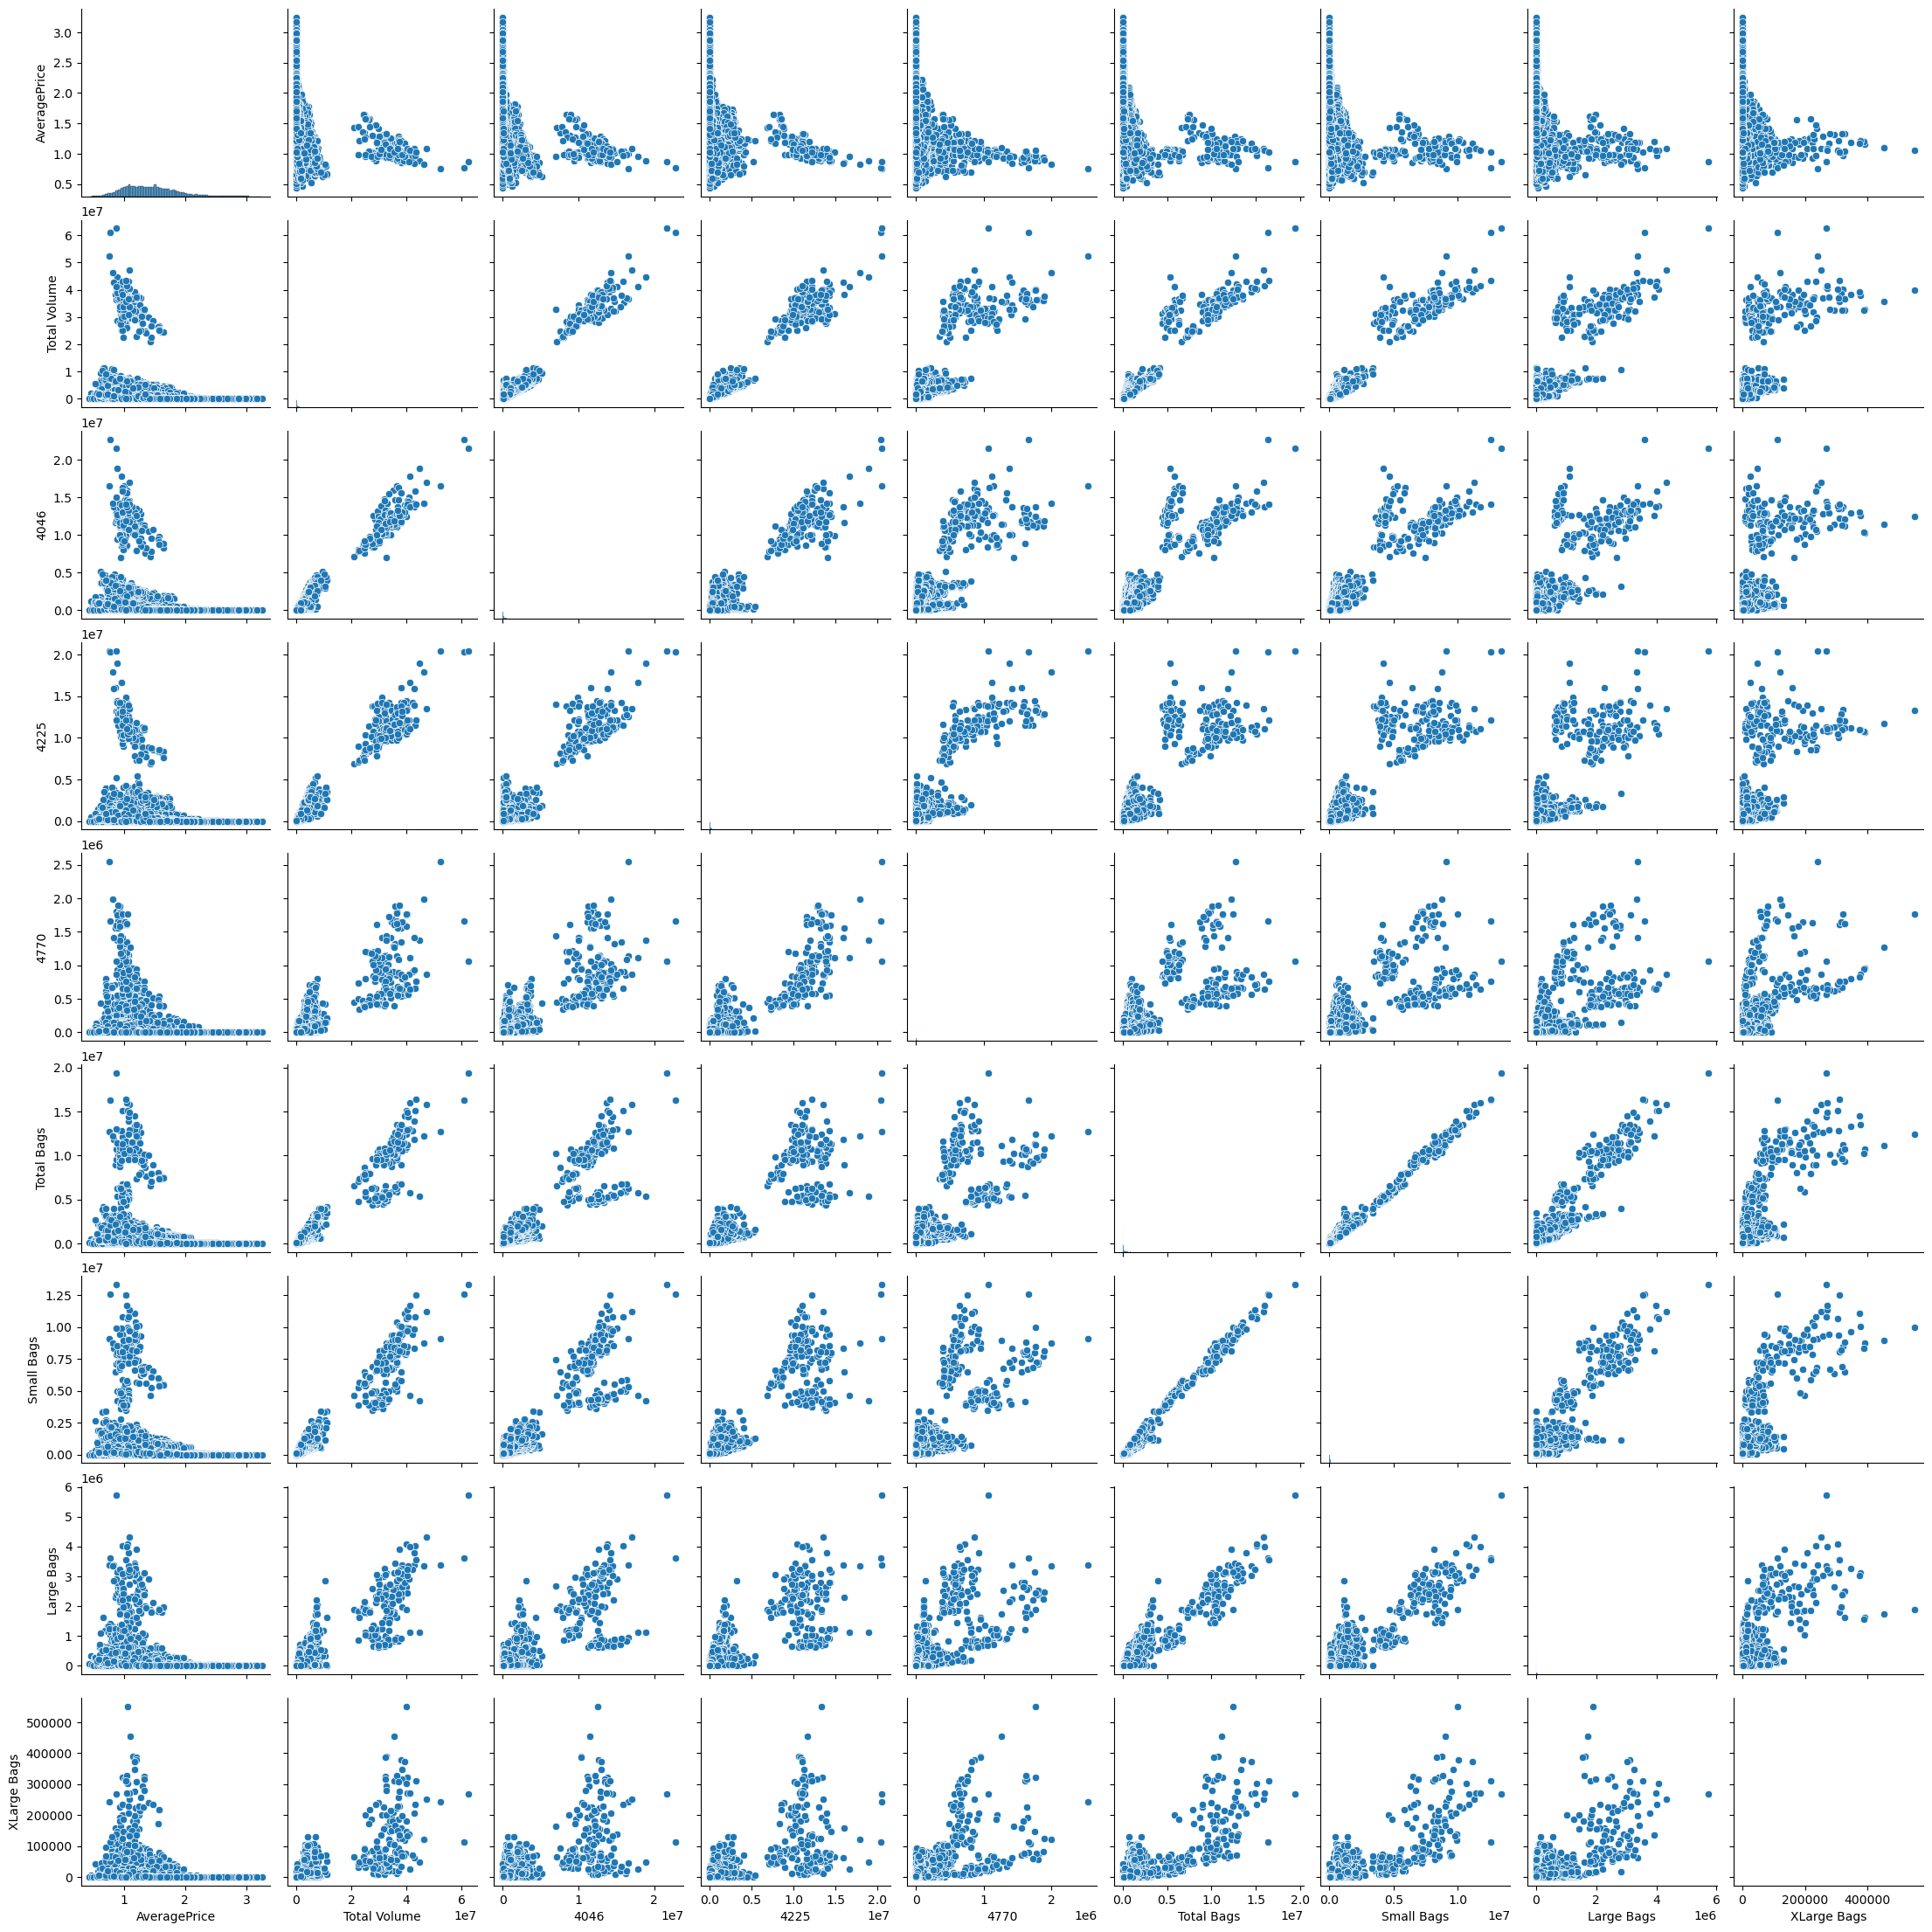

In [43]:
sns.pairplot(df1)

<Axes: xlabel='AveragePrice', ylabel='region'>

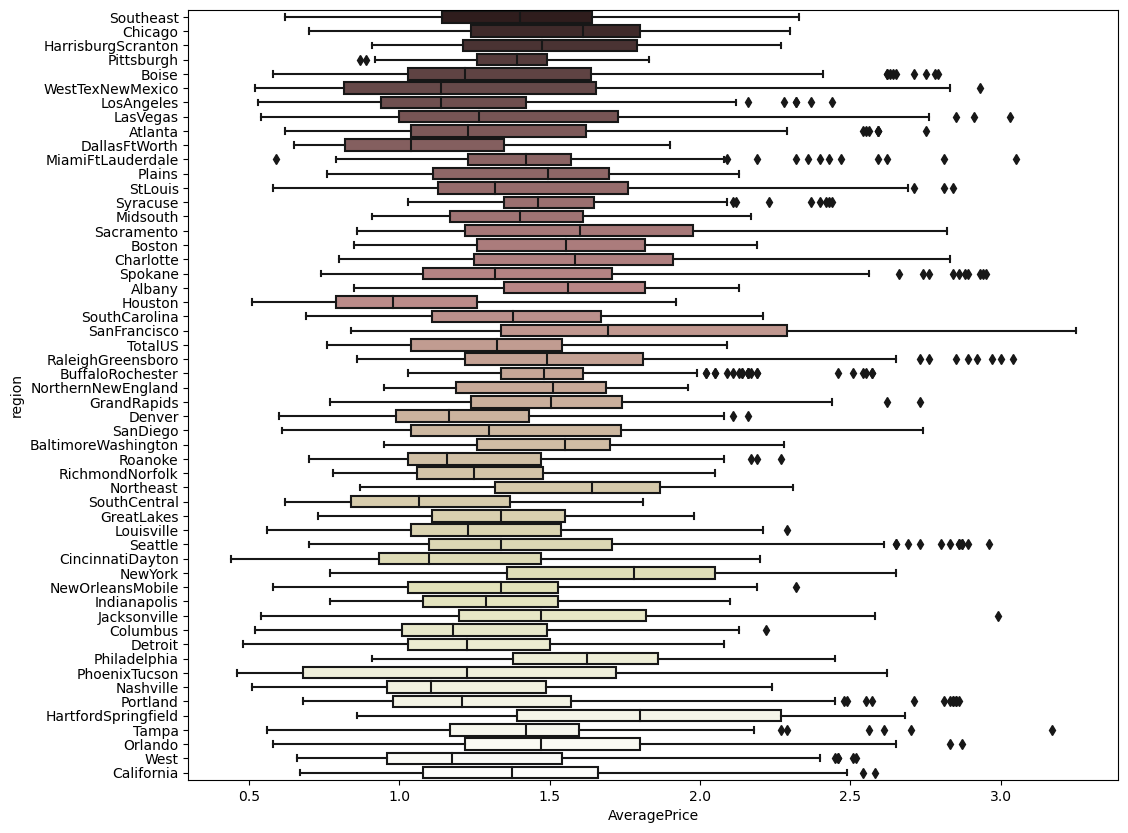

In [41]:
plt.figure(figsize=(12, 10))
sns.boxplot(y="region", x="AveragePrice", data=df, palette = 'pink')

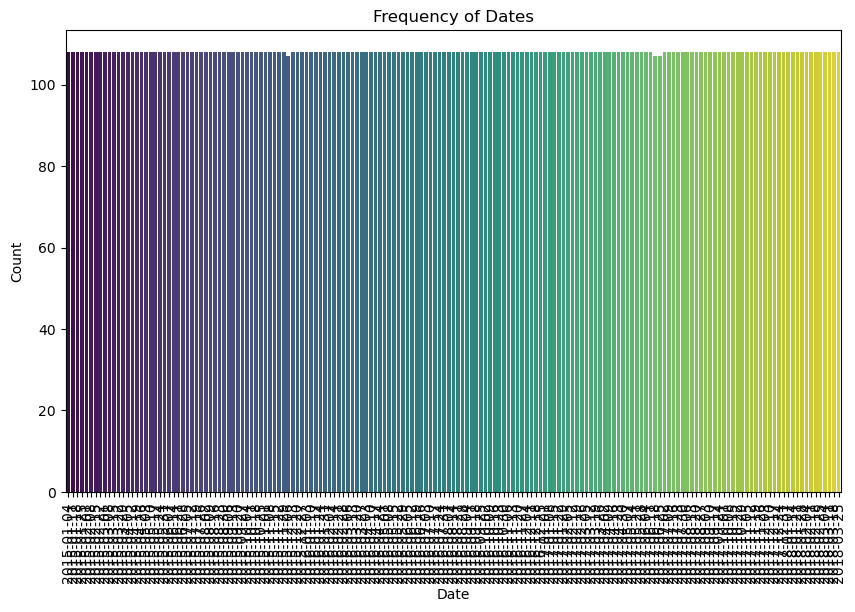

In [44]:
plt.figure(figsize=(10, 6))

# Plot count plot for 'Date'
sns.countplot(data=df, x='Date', palette='viridis')
plt.title('Frequency of Dates')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

 Since the dates are evenly distributed or don't show any discernible patterns, we may conclude that the 'Date' column may not be relevant for our analysis of 'AveragePrice' and 'Region'. Hence dropping it.

In [45]:
# Drop the 'Date' column
df.drop(columns=['Date'], inplace=True)

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3['region']=le.fit_transform(df3['region'])
df3['type']=le.fit_transform(df3['type'])
df3.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
11569,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,1,46
9593,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,1,8
10009,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,1,16
1819,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,0,34
9333,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,1,3


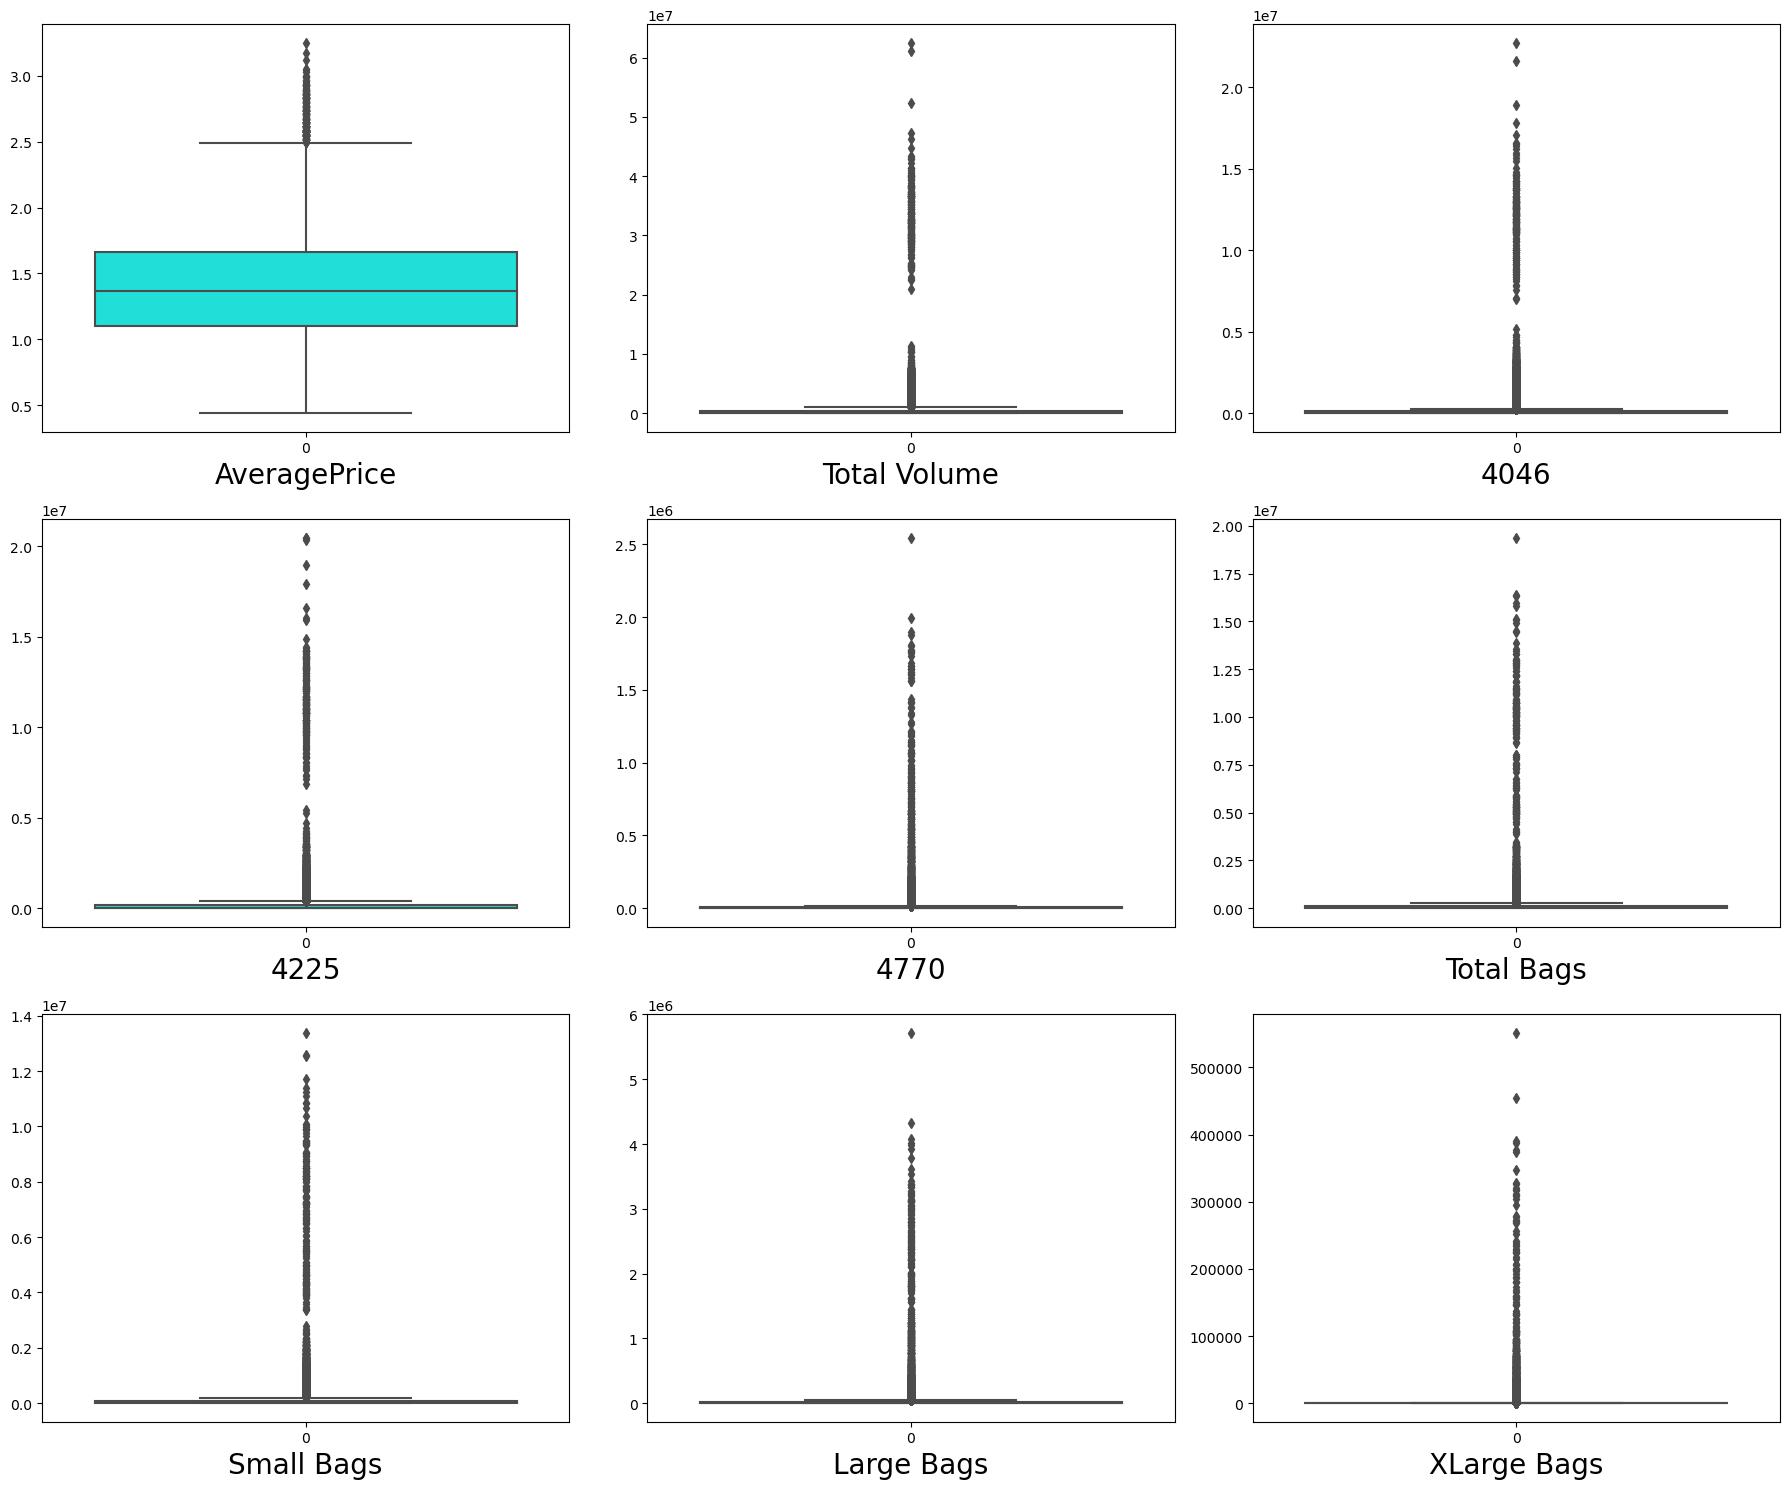

In [47]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df1:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df1[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()


In [48]:
from scipy.stats import zscore
z = np.abs(zscore(df3))
threshold = 3
df4 = df3[(z<3).all(axis = 1)]

In [49]:
df4.shape

(17651, 11)

In [50]:
df4.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
AveragePrice,1.000000,-0.332056,-0.333577,-0.243988,-0.243465,-0.297323,-0.275771,-0.270915,-0.152669,0.613150,-0.003242
Total Volume,-0.332056,1.000000,0.876307,0.871592,0.647518,0.912184,0.905648,0.640642,0.513741,-0.415476,0.076676
4046,-0.333577,0.876307,1.000000,0.565118,0.492127,0.727981,0.706800,0.561060,0.415432,-0.341376,0.119067
4225,-0.243988,0.871592,0.565118,1.000000,0.620221,0.757786,0.778761,0.451711,0.392030,-0.383138,0.011002
4770,-0.243465,0.647518,0.492127,0.620221,1.000000,0.557980,0.571512,0.323747,0.495976,-0.321809,-0.095972
Total Bags,-0.297323,0.912184,0.727981,0.757786,0.557980,1.000000,0.978213,0.746946,0.581690,-0.378205,0.085892
Small Bags,-0.275771,0.905648,0.706800,0.778761,0.571512,0.978213,1.000000,0.593155,0.597700,-0.367593,0.065976
Large Bags,-0.270915,0.640642,0.561060,0.451711,0.323747,0.746946,0.593155,1.000000,0.296864,-0.286813,0.127635
XLarge Bags,-0.152669,0.513741,0.415432,0.392030,0.495976,0.581690,0.597700,0.296864,1.000000,-0.263734,-0.044338
type,0.613150,-0.415476,-0.341376,-0.383138,-0.321809,-0.378205,-0.367593,-0.286813,-0.263734,1.000000,0.018409


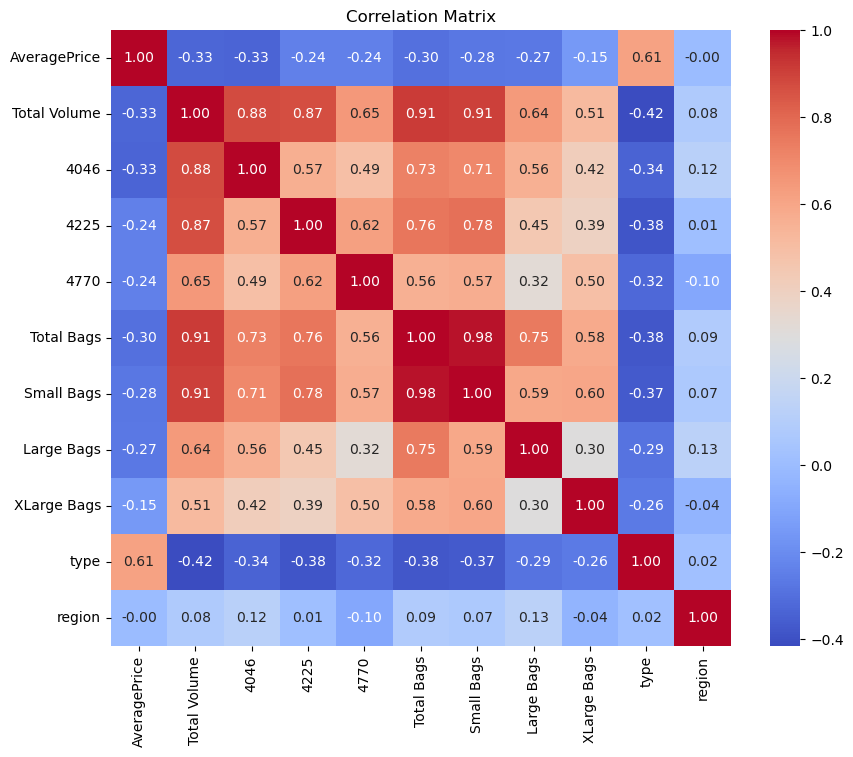

In [53]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df4.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

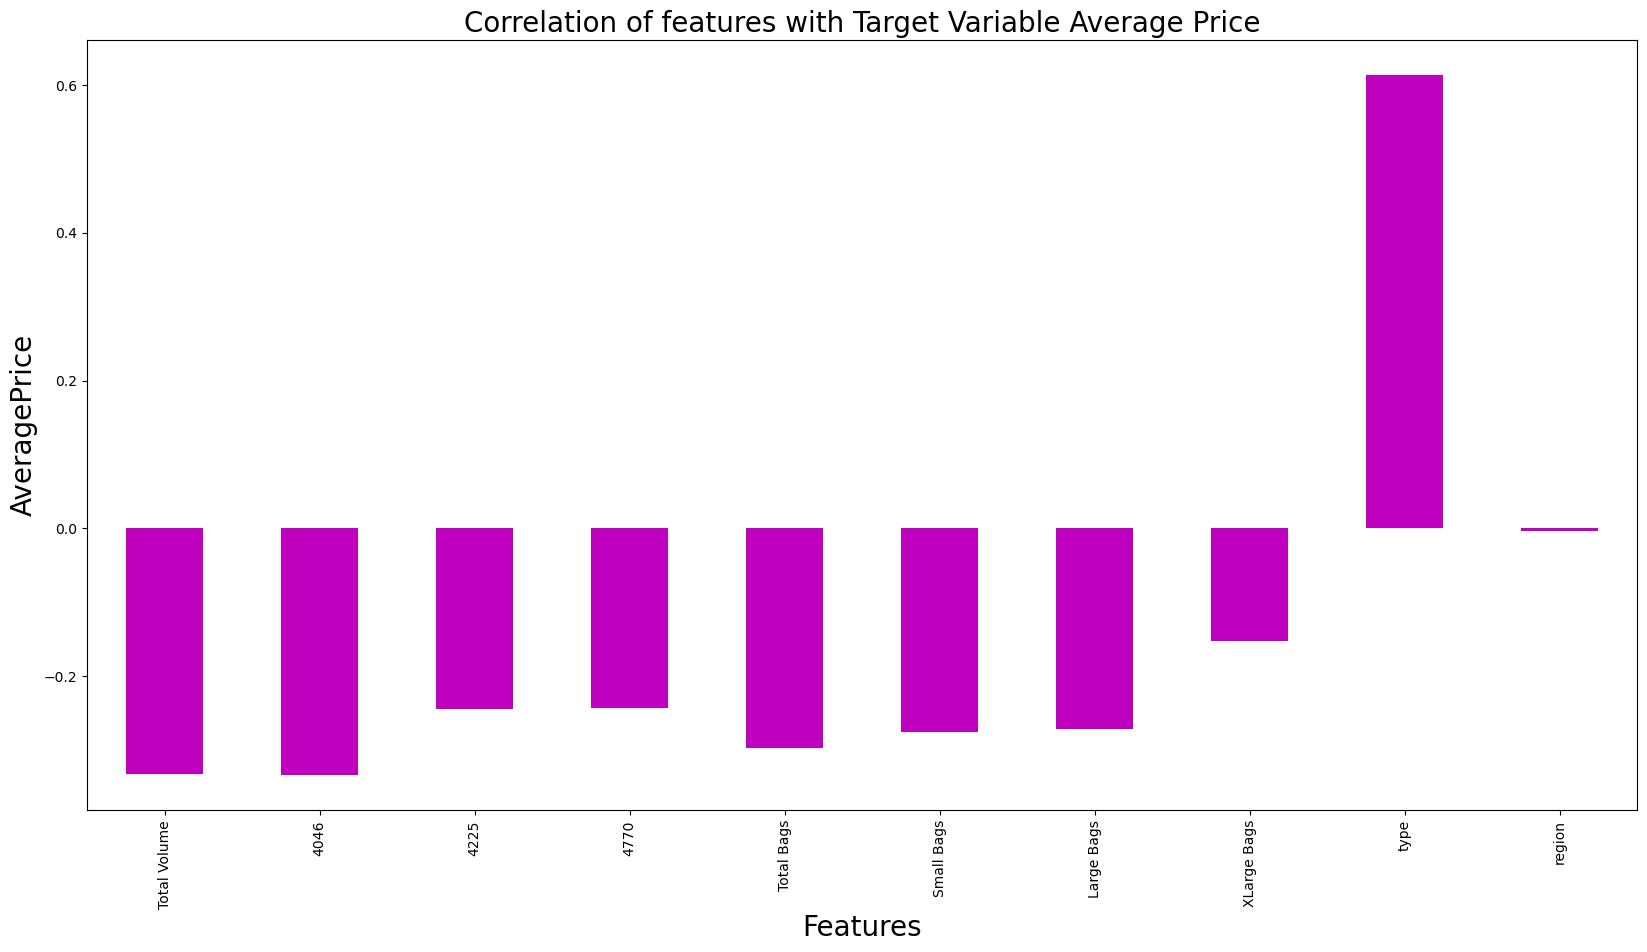

In [54]:
plt.figure(figsize = (20,10))
df4.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'm')
plt.xlabel('Features',fontsize=20)
plt.ylabel('AveragePrice',fontsize=20)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 20)
plt.show()

1. We can see that region column is pooorly correlated, hence dropping it.
2. Also 4046, 4225, 4770 shows high multicollinearity with Total Volume, we should drop them too.
3. The column TotalBags is the sum total of other bags so we dont need it, also dropping it.

In [55]:
df4.drop(columns=['4046','4225','4770','region','Total Bags'],axis=1, inplace=True)

### Checking VIF values

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df4.values,i) for i in range(df4.shape[1])]
vif['Features']= df4.columns
vif

,VIF,Features
0,3.747245,AveragePrice
1,7.584622,Total Volume
2,7.692734,Small Bags
3,1.945974,Large Bags
4,1.693126,XLarge Bags
5,3.358876,type


We can see that the vif values are less than 10.

In [57]:
df4.skew()  # Checking skewness.

AveragePrice    0.377432
Total Volume    3.767138
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
dtype: float64

In [58]:
for col in df4.columns:
    if df4.skew().loc[col]>0.55:
        df4[col]=np.log1p(df4[col])

In [59]:
x = df4.drop('AveragePrice', axis=1)
y = df4['AveragePrice']

### Standard Scalarization

In [60]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(x)

# Model Building

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, random_state=42, test_size=.33)
print('Training feature size:',X_train.shape)
print('Training target size:',Y_train.shape)
print('Test feature size:',X_test.shape)
print('Test target size:',Y_test.shape)

Training feature size: (11826, 5)
Training target size: (11826,)
Test feature size: (5825, 5)
Test target size: (5825,)


In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, random_state=i, test_size=.20)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)


Best R2 Score is 0.45263900561794 on Random_state 123


In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, random_state=123, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [1.34655225 1.15356606 1.64815371 ... 1.18550839 1.61417794 1.71745769]


Actual Wins:
 161      1.09
8941     0.86
11336    1.96
461      1.17
5721     0.93
         ... 
14156    2.23
4125     1.30
2946     1.07
18135    1.47
12371    1.93
Name: AveragePrice, Length: 5825, dtype: float64


In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.22562920514924556
Mean squared error : 0.08187524187515038
Root Mean Squared Error: 0.28613850121077794


 R2 Score :
0.44174123755930905


In [74]:
score = cross_val_score(lin_reg, X_scale, y, cv =5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.3736623389854974


In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [77]:
rf = RandomForestRegressor(n_estimators = 70 ,max_depth=25)
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
grad_b=GradientBoostingRegressor(max_depth=25,learning_rate=0.1)
rd=Ridge(alpha=0.01)
model = [rf,rd,dtc,adb,grad_b]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')




 Error of  RandomForestRegressor(max_depth=25, n_estimators=70) :
Mean absolute error : 0.17910957928241045
Mean squared error : 0.05729206079309549
Root Mean Squared Error: 0.23935760024092714


 R2 Score :
0.609359383575298


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 0.22562920884305243
Mean squared error : 0.0818752421300813
Root Mean Squared Error: 0.28613850165624566


 R2 Score :
0.44174123582108626


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.23461115879828323
Mean squared error : 0.10730295278969958
Root Mean Squared Error: 0.32757129420890896


 R2 Score :
0.2683647430079785


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 0.22508290502984524
Mean squared error : 0.07914517190520776
Root Mean Squared Error: 0.28132751714897664


 R2 Score :
0.4603559670903766


 Error of  GradientBoostingRegressor(max_depth=25) :
Mean absolute error : 0.2159224619505709
Mean squared error : 0.08815622769080018
Root Mean Squared Error: 0.2

In [78]:
# Cross Validation
model = [rf,rd,dtc,adb,grad_b]

for m in model:
    score = cross_val_score(m, X_scale, y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor(max_depth=25, n_estimators=70) :

Mean CV Score : 0.37750229668419866


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.37366234571018675


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : -0.03442713231000614


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.3882680238046402


Cross Validation Score : GradientBoostingRegressor(max_depth=25) :

Mean CV Score : 0.06394045690007066


Among these the Random Forest Regressor has given the maximum R2 score and less value of RMSE. So we will proceed with the Random Forest Regressor model.

# Final Model 

In [85]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=60 ,criterion = 'squared_error', max_depth= 20, max_features = 'sqrt',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.1830549340664209
Mean squared error : 0.05712710469829797
Root Mean Squared Error: 0.2390127709941416


 R2 Score of Final Model :
0.6104841214475737




 True Values Vs Predicted Value plot :


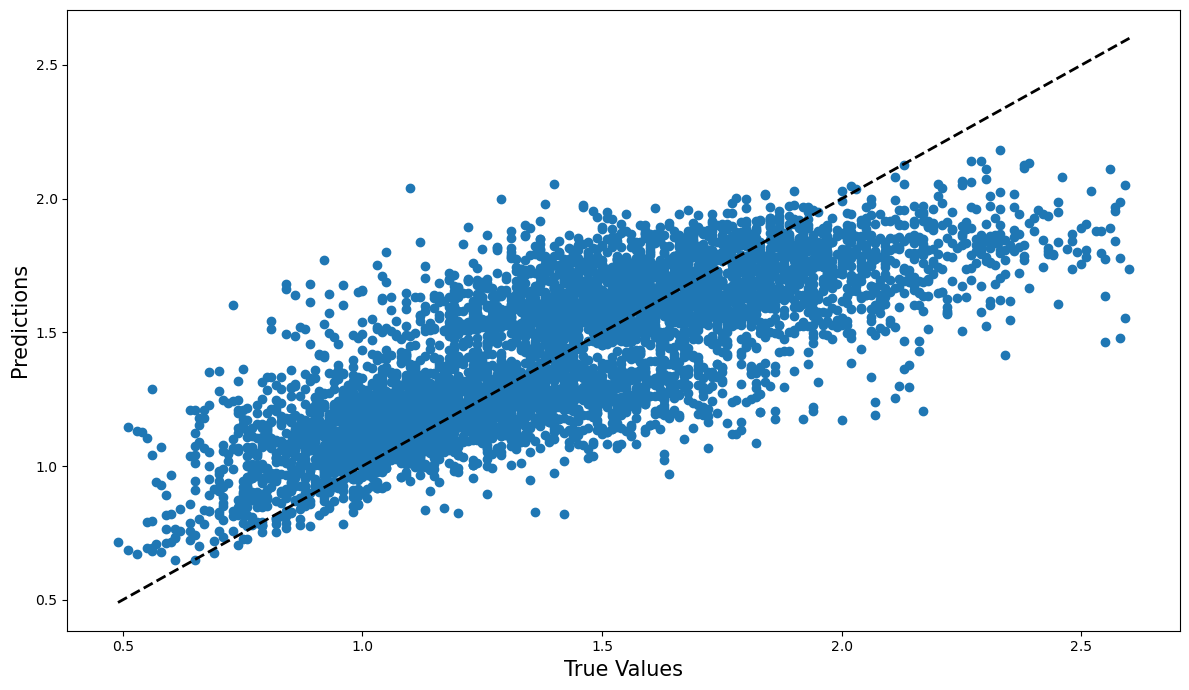

In [89]:
plt.figure(figsize=(12, 7))
y_pred = Final_mod.predict(X_test)
plt.scatter(Y_test.round(2), y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # Plot the diagonal line
print('\033[1m' + ' True Values Vs Predicted Value plot :' + '\033[0m')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()
plt.show()

### Saving Model

In [90]:
import joblib
joblib.dump(Final_mod,'Avacado_Project_Model.pkl')

['Avacado_Project_Model.pkl']